In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

El objetivo de este ejemplo es encontrar el máximo de la función $f(x) = x \, \sin(4x \, - \, 2$), evaluada dentro del intervalo $[-2, 3]$. Supongamos que los números con los que vamos a trabajar los queremos representar con una presición de dos dígitos decimales (es decir, no habrán valores representables entre 0 y 0.01, por ejemplo).

Para comenzar, definimos la función en cuestión:

In [3]:
maximo = 3
minimo = -2
prec = 0.01

def func(x):
    return x * np.sin(4 * x - 2)

En este caso, que es un problema ficticio, podemos graficar la función y observar donde se encuentra el máximo.

O mejor, aplicando análisis matemático, podemos calcular la derivada de la función y calcular sus ceros, para luego ver cual de ellos es el máximo global.

$\frac{df(x)}{dx} = \frac{d \left( x\,\sin(4x\,-\,2) \right)}{dx} = 4x\,\cos(2\,-\,4x)\,-\,\sin(2\,-\,4x) = 0$

Esto permite estimar el máximo en $ x \approx 2.48852668729269 $

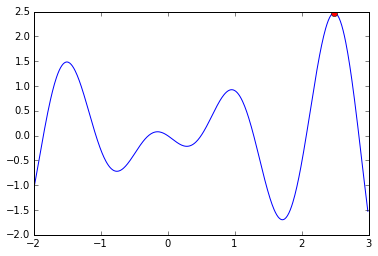

In [4]:
X = np.arange(minimo, maximo, prec)
plt.plot(X, func(X))

maximo_x = 2.48852668729269
plt.plot(maximo_x, func(maximo_x), 'or')

Una posible heurística que podemos usar es la denominada *Hill Climbing*. Para usarla, debemos definir tres cuestiones fundamentales:

1. Cómo se van a representar las potenciales soluciones al problema y de que manera se podrán generar soluciones al azar.

2. Cómo calificar una soluciones potencial, para comparar dos soluciones representadas y poder determinar cual de las dos es mejor que la otra intentando resolver el problema (aunque ninguna de las dos realmente lo resuelva).

3. Cómo generar a partir de una solución dada un conjunto de nuevas soluciones vecinas a esta, lo que implica definir además una métrica de distancia entre soluciones.
 
Pero primero, implementamos el algoritmo:

In [5]:
def hill_climb(solucion_inicial, evaluacion, obtener_vecinos):
    """
    Hill climbing determinístico.
    """
    soluciones_evaluadas = 1
    solucion_actual = solucion_inicial
    evaluacion_actual = evaluacion(solucion_actual)

    optimo_local = False
    while not optimo_local:
        vecinos = obtener_vecinos(solucion_actual)
        optimo_local = True
        for vecino in vecinos:
            evaluacion_vecino = evaluacion(vecino)
            soluciones_evaluadas += 1
            if evaluacion_vecino > evaluacion_actual:
                solucion_actual = vecino
                evaluacion_actual = evaluacion_vecino
                optimo_local = False

    return solucion_actual, soluciones_evaluadas

Si a las soluciones se las representan como valores en punto flotante, puede generarse una solución al azar usando la función `random()` y escalando el valor al intervalo de trabajo, redondeando con `round()` a la cantidad de decimales que define la precisión.

In [6]:
def nueva():
    return round(minimo + random.random() * (maximo - minimo), 2)

In [7]:
print(nueva(), nueva(), nueva(), nueva(), nueva(), nueva(), sep='    ')

1.89    -1.2    1.1    -1.14    1.69    0.87


Para evaluar una solución, podemos usar directamente la función que queremos maximizar ya que si la calificación de un punto será el valor de la función evaluada en ese punto, cuanto mayor sea mejor será resolviendo el problema.

In [8]:
def evaluacion(x):
    return func(x)

Para generar soluciones dentro de la vecindad de una solución dada, simplemente generamos 4 nuevas soluciones: $[ x-0.03, x-0.01, x+0.01, x+0.03]$. Estas cuatro soluciones tienen la particularidad que se encuentran dentro del entorno $(x \pm 0.05)$ y son valores representados con la precisión deseada.

Es importante tomar la precaución de no generar soluciones fuera del rango permitido. Por ejemplo, si $x=3$, no deberían generarse soluciones mayores que x pues se encontrarían fuera del rango fijado para el problema.

In [9]:
def vecinos(x):
    v = []
    d = -0.03
    for i in range(4):
        n = x + d
        if n >= minimo and n <= maximo:
            v.append(n)
        d += 0.02
    return v

In [10]:
print(vecinos(0.5), vecinos(1), vecinos(minimo), vecinos(maximo), sep="\n")

[0.47, 0.49, 0.51, 0.53]
[0.97, 0.99, 1.01, 1.03]
[-1.99, -1.97]
[2.97, 2.99]


Finalmente, podemos invocar al algoritmo generando una solución inicial al azar y pasando la función de evaluación y la función generadora de vecinos:

In [18]:
inicial = nueva()
mejor, evaluaciones = hill_climb(inicial, evaluacion, vecinos)

Podemos ver el resultado de la ejecución junto con la cantidad de soluciones que tuvieron que evaluarse para conseguirla:

Cantidad de soluciones evaluadas: 44
Solución inicial: 2.75
Solución obtenida: 2.4900000000000015
Valor de func para esa solución: 2.47601943442


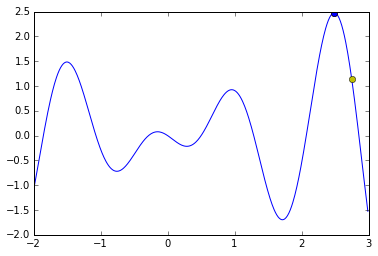

In [19]:
plt.plot(X, func(X),
         maximo_x, func(maximo_x), 'or',  # Punto rojo: Máximo de la función
         inicial, func(inicial), 'oy',    # Punto amarillo: Solución inicial
         mejor, func(mejor), 'ob')        # Punto azul: Mejor solución encontrada

print("Cantidad de soluciones evaluadas:", evaluaciones)
print("Solución inicial:", inicial)
print("Solución obtenida:", mejor)
print("Valor de func para esa solución:", func(mejor))

Si repetimos varias veces el algoritmo:

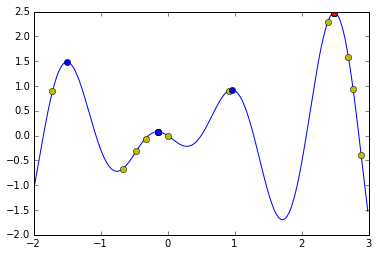

In [13]:
plt.plot(X, func(X))

for n in range(10):
    i = nueva()
    m, _ = hill_climb(i, evaluacion, vecinos)
    plt.plot(i, func(i), 'oy', m, func(m), 'ob')

plt.plot(maximo_x, func(maximo_x), 'or')

In [20]:
def evaluacion_para_minimo(x):
    return -func(x)

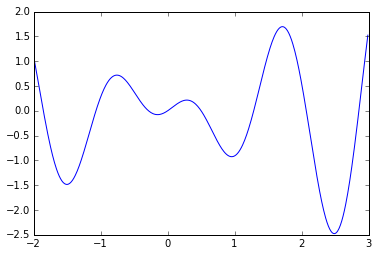

In [21]:
plt.plot(X, -func(X))

Cantidad de soluciones evaluadas: 92
Solución inicial: -1.42
Solución obtenida: -0.7599999999999993
Valor de func para esa solución: -0.71957846945


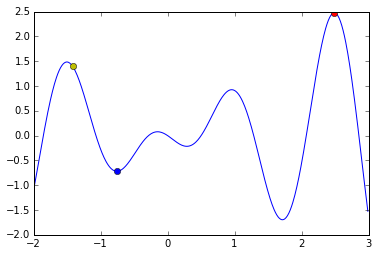

In [30]:
inicial = nueva()
mejor, evaluaciones = hill_climb(inicial, evaluacion_para_minimo, vecinos)

plt.plot(X, func(X),
         maximo_x, func(maximo_x), 'or',  # Punto rojo: Máximo de la función
         inicial, func(inicial), 'oy',    # Punto amarillo: Solución inicial
         mejor, func(mejor), 'ob')        # Punto azul: Mejor solución encontrada

print("Cantidad de soluciones evaluadas:", evaluaciones)
print("Solución inicial:", inicial)
print("Solución obtenida:", mejor)
print("Valor de func para esa solución:", func(mejor))